# 정부가 시행한 '2020 교통사고 사망자 줄이기 대책' 검증


# 사용할 데이터
- 도로교통공단에서 제공한 사고유형별 교통사고 통계.
- 20~22년도 기한에 해당하는 자료 사용

#데이터 전처리
<hr/>

In [6]:
#한글 폰트 패치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [2]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [3]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy/main Sources [2,246 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,535 kB]
Get:13 https://ppa.launchpadcontent

E: Package 'python-dev' has no installation candidate


In [4]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


### 사용할 패키지
#### 판다스, 넘파이, 맷플롭, scipy

### 사용 데이터
#### 공공데이터 - 도로교통공단_사고유형별 교통사고 통계 20~22년도 자료

In [232]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

file_type22 = pd.read_csv('./도로교통공단_사고유형별 교통사고 통계_20221231.csv',encoding='cp949')
file_type21 = pd.read_csv('./도로교통공단_사고유형별 교통사고(2021).csv',encoding='cp949')
file_type20 = pd.read_csv('./도로교통공단_사고유형별 교통사고(2020).csv',encoding='cp949')

#file_fiveYears = pd.read_csv('./data/도로교통공단_최근5년 교통사고 통계_20221231.csv', encoding='cp949')

In [59]:
# file_type22.head()

In [58]:
# file_type21.head()

In [57]:
# file_type20.head()

# 사용할 데이터 분류

사고유형대분류에서 차량 단독은 값이 비교적 적으므로 제외

column에서 사고유형중분류와 사고유형이 같으므로 '사고유형' 으로 사용

# 시행된 정책 내용 요약

- 보행자 안전 보장

> 보행자

    1. 보행자 우선 교통체계
    2. 횡단보도 조명시설 확충
    3. 어린이 보호구역에 무인단속장비와 신호등 설치, 제한속도 하향
> 운전자

    1. 운전자의 도심 내 제한속도 하향
    2. 음주운전 사고 시 부담금 대폭 확대
    3. 운전 중 영상 시청 시 중사 자격 정지 or 취소

- 운전자 배려
  1. 65세 이상 고령 택시 운전자 관리 강화

  2. 사고가 잦은 곳 집중 개선 및 노후화된 구간 보수

  3. 제설제 예비 살포

  4. 졸음쉼터 확대 및 개량

# 정책 내용을 토대로 비교할 자료 분류
### 차대차 자료는 충돌에 따른(정면, 측면, 후면 등)분류이지만 세세한 분류로 비교하기 매우 까다로우므로 통합


---
- 차대사람
  - 횡단중
  - 차도통행중
  - 길가장자리통행중
  - 보도통행중

- 차대차
  - 통합


  

##### 년도별 데이터를 그룹화하는 함수 선언

###### 년도별 데이터에서 사고유형대분류로 다시 나눔

In [409]:
h_list=['사고건수','사망자수','중상자수','경상자수']
y_index=['2022년','2021년','2020년']
y_list=[2022,2021,2020]

def reshape_year(df):

  #차대사람과 차대차를 구분하기 위해 각각 그룹화
  gd1=df.groupby(['사고유형대분류','사고유형'])[h_list].sum()
  gd2=df.groupby(['사고유형대분류'])[h_list].sum()

  #차대사람과 차대차로 구분
  cnh=gd1.loc['차대사람'].transpose()
  cnc=gd2.loc['차대차'].to_frame()

  return cnh, cnc


In [400]:
df1=file_type22
df2=file_type21
df3=file_type20

#튜플 형식으로 데이터 저장
(cnh22, cnc22)=reshape_year(df1)
(cnh21, cnc21)=reshape_year(df2)
(cnh20, cnc20)=reshape_year(df3)


In [401]:
#저장 확인
cnc22['차대차']

사고건수    151676
사망자수      1171
중상자수     34954
경상자수    186035
Name: 차대차, dtype: int64

## 정책의 주요 요지는 보행자와 노년층의 안전을 중심으로 함

## 이 때 시행된 정책의 내용은 두 가지로 분류할 수 있음

#### 안전 시설 강화 및 확충
1. 횡단보도 조명시설 확충
2. 사고가 잦은 구간 집중 개선 및 노후화된 구간 보수
3. 제설제 및 졸음쉼터 확충


#### 차량 운전자의 행동 억제
1. 도심 내 제한속도 하향
2. 보행자 우선 교통체계
3. 음주사고 부담금 대폭 상향
4. 영상 시청 시 종사 자격 정지 or 취소

<hr/>


### 각 항목에 대한 년도별 데이터를 추출하고, 대응표본 t-검정을 실시하여 유의미한 차이를 분석

### 대응표본 t-검정이란?

1. 가설 설정: 두 가지 가설 설립
- 귀무가설 : 두 그룹 간에 차이가 없다.
- 대립가설 : 두 그룹 간에 차이가 있다.

2. 표본 데이터 수집: 데이터를 수집하여 두 그룹 간의 평균이나 차이 등을 계산

3. 통계 분석: 수집한 데이터로부터 통계량(t-statistic)을 계산. 이 값은 두 그룹 간의 평균 차이를 표준 오차로 나타냄

4. p-value 계산: 통계량을 이용하여 p-value를 계산. 이 값은 귀무가설이 참일 때, 극단적인 결과를 얻을 확률을 나타냄

5. 결과 해석: p-value를 유의수준(일반적으로 0.05)과 비교
- p-value < 0.05: 두 그룹 간에는 통계적으로 유의한 차이가 있다.
- p-value ≥ 0.05: 두 그룹 간에는 통계적으로 유의한 차이가 없다.

- 즉, p-value값을 유사 레벨로 보면 된다
  - p-value가 작으면 두 그룹 간에 차이가 있다고 판단
  - p-value가 크면 두 그룹 간에 차이가 없다고 판단
  <hr/>


In [406]:
# 사고유형 데이터 추출 함수
def getColumn(str):

  # concat 및 인덱스 설정을 위한 변수
  s_list=[]

  # 차대차인 경우는 통합하므로 자체 컬럼으로 사용
  if(str=='차대차'):

    # 위에서 추출한 데이터를 이용하여 데이터 생성
    # 필드값을 행에서 열로 변경하기 위한 전환
    s_list.append(cnc22[str].to_frame().transpose())
    s_list.append(cnc21[str].to_frame().transpose())
    s_list.append(cnc20[str].to_frame().transpose())

    # 병합
    df_get=pd.concat(s_list,ignore_index=True)
    df_get.index=y_index

    # 정렬하여 리턴
    return df_get.sort_index(ascending=True)

  #차대사람인 경우 컬럼 지정하여 사용
  else:
    s_list.append(cnh22[str].to_frame().transpose())
    s_list.append(cnh21[str].to_frame().transpose())
    s_list.append(cnh20[str].to_frame().transpose())

    df_get=pd.concat(s_list,ignore_index=True)
    df_get.index=y_index

    return df_get.sort_index(ascending=True)


In [407]:
df_across=getColumn('차대차')
df_across

,사고건수,사망자수,중상자수,경상자수
2020년,164552,1299,42771,200627
2021년,160032,1238,39153,194403
2022년,151676,1171,34954,186035


### 데이터를 임의로 생성
#### 사망자수 값에서 임의의 값 30개 생성

In [485]:
import random

# 원본에서 임의의 값 생성 함수
def generate_random_data(original_data, year, column):
    data = original_data.loc[year][column]
    # df_across['2022년']['사고건수']

    new_data_series = []
    for _ in range(30):
        # radint 매개변수로 최소, 최댓값 변수 선언
        # 원본 데이터에서 0.05를 곱한 값으로 범위 설정
        # 0.05로 한 이유는 유의수준 p-value 기준을 0.05로 잡았기 때문
        range_min=round(data*(-0.05))
        range_max=round(data*0.05)

        # 임의의 값 선택
        random_change = random.randint(range_min, range_max)

        # 새로운 사망자수 계산
        new_data = data + random_change

        # 음수인 경우 0으로 조정
        new_data = max(new_data, 0)

        new_data_series.append(new_data)

    return new_data_series

In [484]:
# 대응표본 t-검정 수행 함수
def ttest(data1,data2, printYear=''):

  print(printYear)

  t_statistic, p_value = ttest_rel(data1, data2)

  # 결과 출력
  print("t-statistic:", t_statistic)
  print("p-value:", p_value)

  # 가설 검정
  alpha = 0.05
  if p_value < alpha:
    print("대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음\n")
  else:
    print("귀무가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 없음\n")
    print('해당 컬럼에서 정책의 효율이 떨어진다고 판단할 수 있다')

# 년도 통합
def ttest_thr(data1,data2,data3):
  ttest(data1,data2,'2020/2021')
  ttest(data2,data3,'2021/2022')
  print('-'*40)

# ttest_thr(data2020,data2021,data2022)

# 값 생성과 t검정 통합
def generateAndTtest(df,human):
  data1=generate_random_data(df, y_index[0], human)
  data2=generate_random_data(df, y_index[1], human)
  data3=generate_random_data(df, y_index[2], human)
  ttest_thr(data3,data2,data1)


In [487]:
# Boxplot 그리기 함수
def drowBox(data1,data2,data3,y=''):
  plt.figure(figsize=(8, 6))
  plt.boxplot([data1, data2, data3], labels=y_index)
  plt.title('')
  plt.xlabel('년도')
  plt.ylabel(y)
  plt.show()

### 임의의 값 생성으로 인해 귀무가설을 만족하는 경우와 대립가설을 만족하는 경우가 번갈아가며 나타날 수 있음

### 이를 loop 매개변수로 설정하여 분석할 데이터의 반복 여부를 결정함

In [509]:
# 함수 통합

# 입력값 : 사고유형, 인명피해유형
# 루프가 True라면 9번 반복 = 10번
def setHyp(column, human, loop='off'):
  df=getColumn(column)
  data1=generate_random_data(df, y_index[0], human)
  data2=generate_random_data(df, y_index[1], human)
  data3=generate_random_data(df, y_index[2], human)
  ttest_thr(data3,data2,data1)
  if loop=='on':
    i=0
    while(i<9):
      generateAndTtest(df,human)
      i+=1

  drowBox(data3,data2,data1, human)

#데이터 분석
<hr/>

##### 1.1 횡단보도 조명시설 확충
- 사고유형 : 횡단중에 해당

2020/2021
t-statistic: 5.079062197991382
p-value: 2.0361410336624146e-05
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

2021/2022
t-statistic: -3.963934523691702
p-value: 0.00044118871720104255
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

----------------------------------------


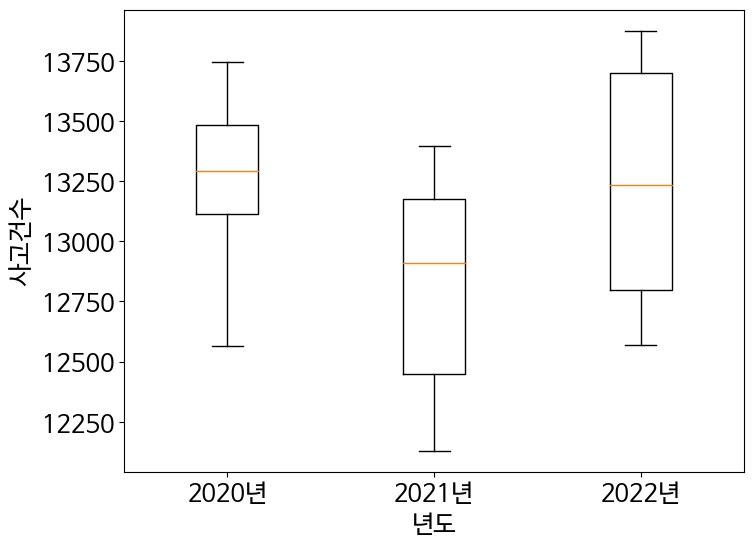

In [505]:
setHyp('횡단중','사고건수')

2020/2021
t-statistic: 17.645547480022014
p-value: 4.7490108730245833e-17
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

2021/2022
t-statistic: 6.915071819679436
p-value: 1.3407037250017807e-07
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

----------------------------------------


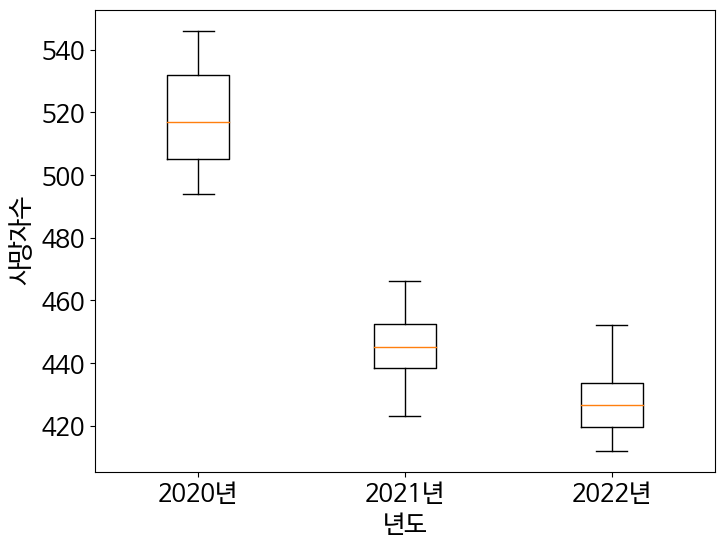

In [512]:
setHyp('횡단중','사망자수')


- 사고건수는 21년에 들어서며 줄어들었지만 22년에 소폭 상승하였음
- 그러나 사망자수는 21년 22년 동일하게 감소한 것을 알 수 있음

### 즉, 횡단보도 및 조명시설 확충은 기대 효과를 만족함

##### 1.2 사고가 잦은 구간 집중 개선 및 노후화된 구간 보수
- 사고유형 : 길가장자리구역통행중에 해당

2020/2021
t-statistic: 8.77874223835266
p-value: 1.1617726346737685e-09
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

2021/2022
t-statistic: -8.666275519516176
p-value: 1.5279602996150432e-09
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

----------------------------------------


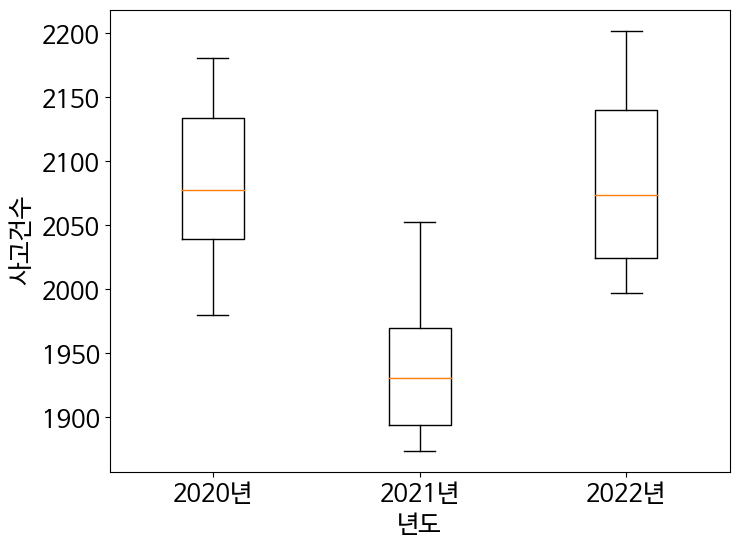

In [513]:
setHyp('길가장자리구역통행중','사고건수')

2020/2021
t-statistic: 15.814605322977235
p-value: 8.519699366221443e-16
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

2021/2022
t-statistic: -20.932483707677534
p-value: 4.757631870237988e-19
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

----------------------------------------


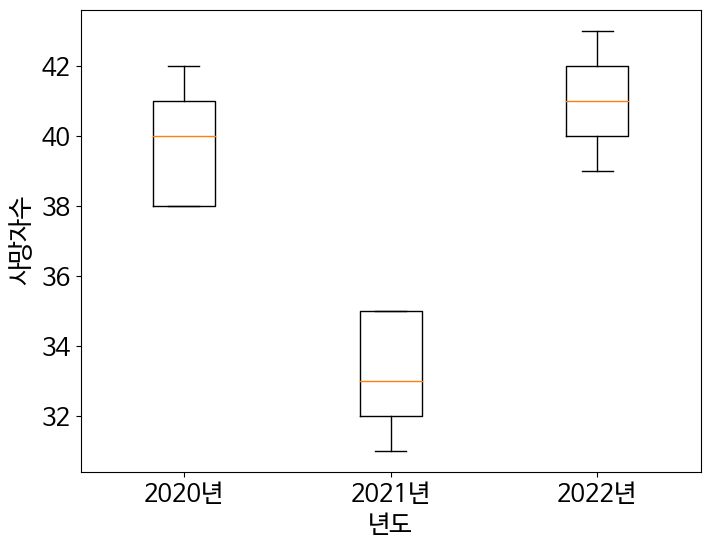

In [514]:
setHyp('길가장자리구역통행중','사망자수')

- 사고건수와 사망자수가 동일한 모양의 그래프를 그리고 있음
- 21년에 줄어들었다 22년에 다시 상승함

### 사고가 잦은 구간 집중 개선 및 노후화된 구간 보수는 효과가 미약하게 나타났지만 보환이 필요해보임

##### 1.3 제설제 및 졸음쉼터 확충
- 사고유형 :

##### 2.1 도심 내 제한속도 하향
- 사고유형 : 차도통행중에 해당

2020/2021
t-statistic: 2.853756549904646
p-value: 0.007893364190005584
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

2021/2022
t-statistic: -25.718259887456703
p-value: 1.6339909446897543e-21
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

----------------------------------------


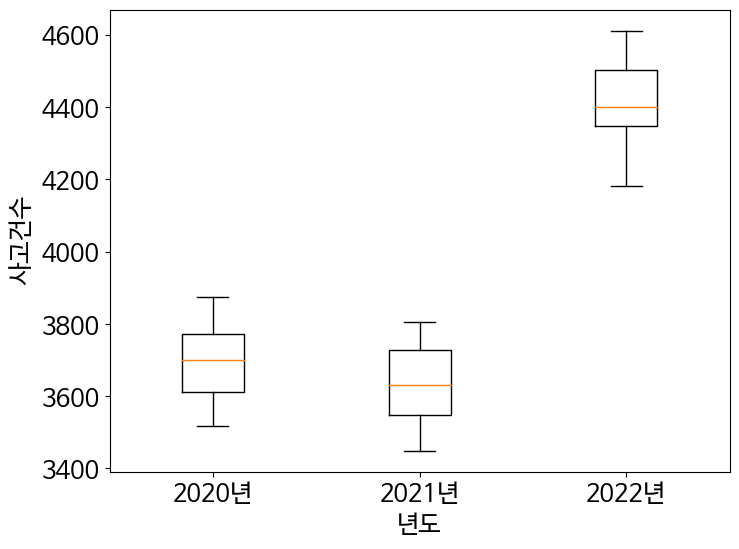

In [515]:
setHyp('차도통행중','사고건수')

2020/2021
t-statistic: 29.59255872850654
p-value: 3.2279590512438307e-23
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

2021/2022
t-statistic: -2.327100414993606
p-value: 0.027147526723123108
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

----------------------------------------


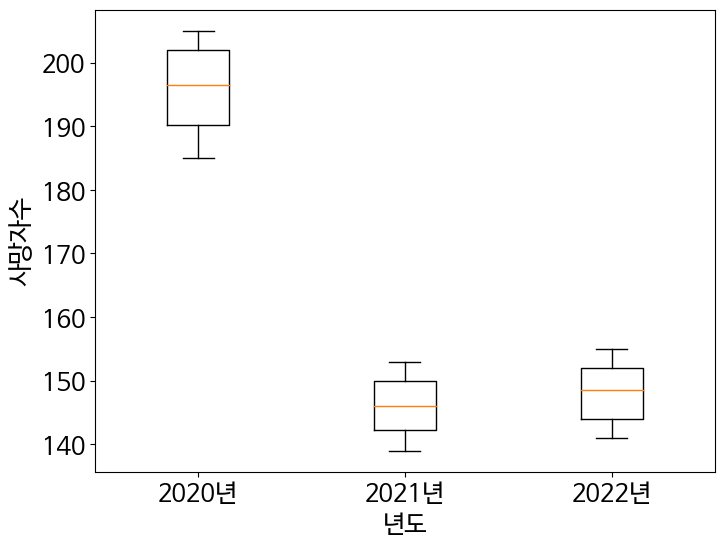

In [516]:
setHyp('차도통행중','사망자수')

- 사고건수가 22년에 눈에 띌 정도로 크게 상승한 것을 알 수 있음
- 사망자수는 21년에 대폭 감소한 것을 알 수 있음

### 도심 내 제한속도 하향은 사고건수가 많아지고 사망자수는 줄어들었으므로 좀 더 보완을 한다면 뛰어난 효과를 보일 것으로 예상됨

##### 2.2 보행자 우선 교통체계
- 사고유형 : 보도통행중에 해당

2020/2021
t-statistic: -15.314824863331612
p-value: 1.9633590283570707e-15
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

2021/2022
t-statistic: -19.580965277831826
p-value: 2.9121282821028434e-18
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

----------------------------------------


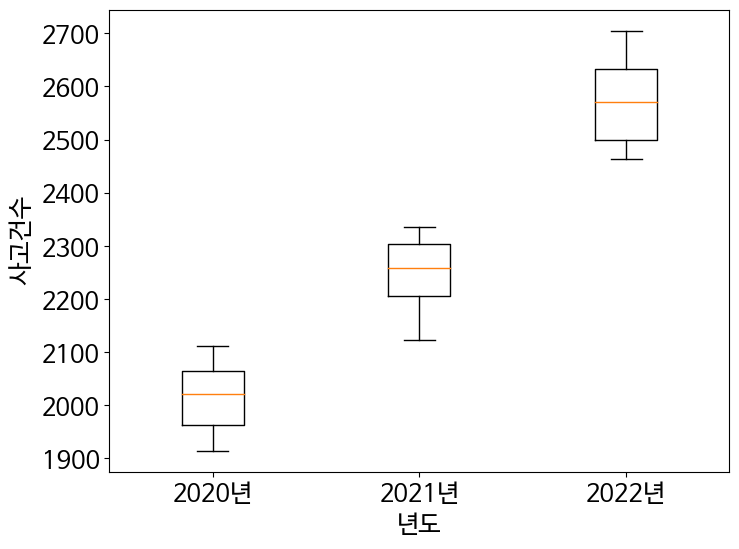

In [517]:
setHyp('보도통행중','사고건수')

2020/2021
t-statistic: 22.654709714226584
p-value: 5.459924531776429e-20
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

2021/2022
t-statistic: -15.522318226102438
p-value: 1.3846702801116591e-15
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

----------------------------------------


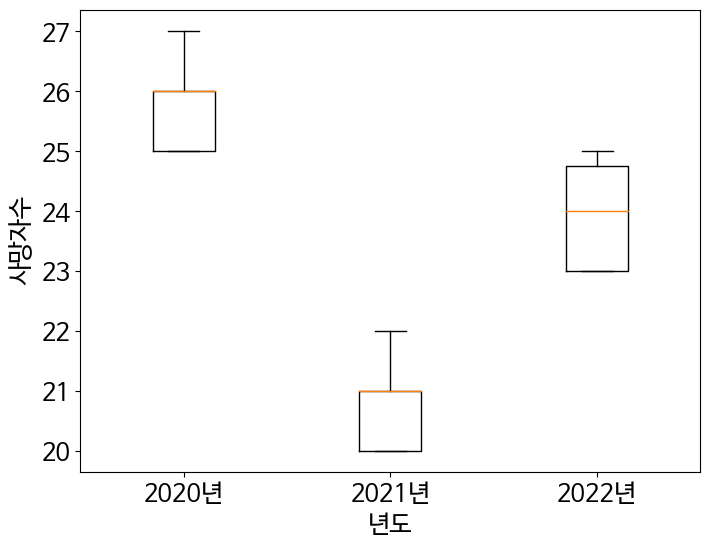

In [519]:
setHyp('보도통행중','사망자수')

- 사고건수가 점점 증가하는 비이상적 형태임
- 사망자수는 21년에 크게 감소하였지만 22년에 다시 상승함

### 보행자 우선 교통체계는 시급히 추가적인 대책을 마련해야함

##### 2.3 음주사고 부담금 대폭 상향
##### 2.4 영상 시청 시 종사 자격 정지 or 취소
- 사고유형 : 차대차에 해당

2020/2021
t-statistic: 4.466791085393293
p-value: 0.00011129007995772272
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

2021/2022
t-statistic: 7.435310704439474
p-value: 3.411687014280412e-08
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

----------------------------------------


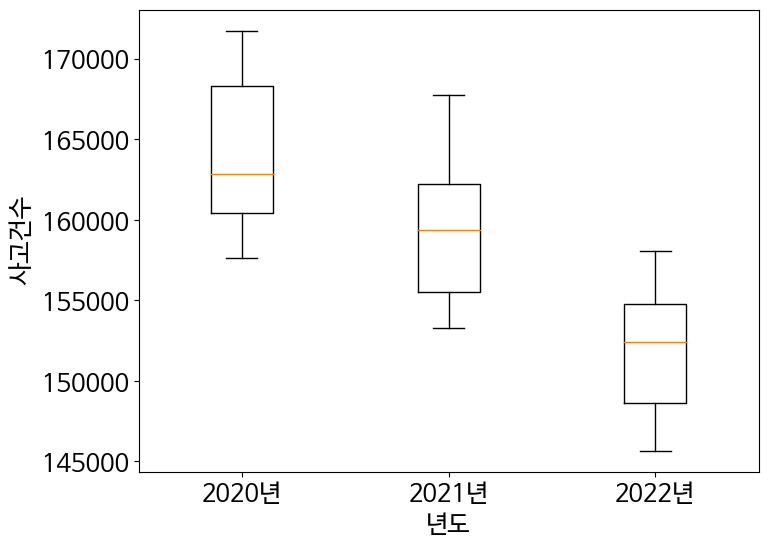

In [520]:
setHyp('차대차','사고건수')

2020/2021
t-statistic: 5.420646367671681
p-value: 7.883897439356038e-06
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

2021/2022
t-statistic: 6.41115177887892
p-value: 5.189479314207147e-07
대립가설 만족. 두 집단 간에는 통계적으로 유의한 차이가 있음

----------------------------------------


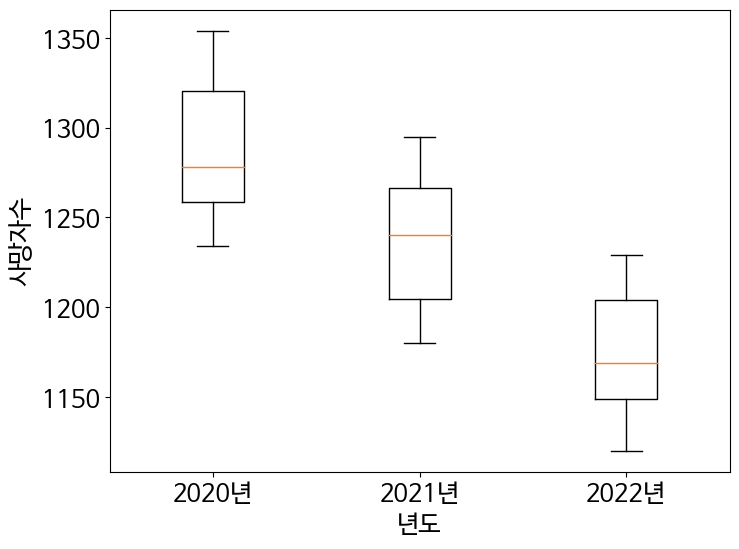

In [521]:
setHyp('차대차','사망자수')

- 사고건수와 사망자수 둘 다 동일하게 감소하는 이상적인 형태의 그래프를 나타냄

### 음주사고 부담금 대폭 상향 및 영상 시청 제약은 뛰어난 효과를 보이고 있음

In [ ]:
#---------------------------------------------결론------------------------------------------------

<hr/>

# 결론







#### **횡단보도 및 조명시설 확충 | 음주사고 부담금 대폭 상향 | 영상 시청 제약은 뛰어난 효과를 보이고 있음**
##### 여기서 특징을 묶을 수 있는데 조명시설 확충, 음주사고는 저녁 및 새벽 시간에 해당하고, 음주사고와 영상 시청 제약은 운전자의 행동 제약에 해당함
##### 즉, **한밤의 운전자의 편의성 확충과 행동 억제가 효과적이었다는 것을 알 수 있음**
##### 이는 **정책 시행 방향성을 운전자쪽에 집중하면 효과를 볼 수 있을거라 예상이 가능함**

#### 그러나 **보행자 우선 교통체계는 효과를 전혀 보이고 있지 않음**
#### 이는 **보행자 안전 중심의 정책 본질이 퇴색될 수 있으므로** 빠른 대책이 필요할 것으로 보임

#### 사고가 잦은 구간 집중 개선 및 노후화된 구간 보수와 도심 내 제한속도 하향은 개선이 필요해보임
##### 이를 통해 알 수 있는 것은, **정책 시행 전에는 도심에 개선해야 할 것들이 많았다는 의미**이며, 이대로 효과를 계속 볼 수 있다면 **도심에서의 사고를 크게 줄어들 수 있을 것으로 보임**

#### 참고 자료
- https://jimmy-ai.tistory.com/152
- https://jae-eun-ai.tistory.com/48
- https://rfriend.tistory.com/754
- https://www.data.go.kr/data/15070282/fileData.do